### <b>Data reminder</b>

In Colab, be sure to upload your <tt>.csv</tt> cleaned data file.

For example, to run the cell below you will need the <tt>iris_cleaned.csv</tt> file -- it's [here](https://drive.google.com/drive/folders/1Qnie8N2VCdumwaFxFldJ_1iQmvtb40pZ?usp=drive_link)

Download it to your machine and then upload it to Colab into the _folder_ &nbsp; icon at left.

In [ ]:
#
# Modern modeling ~ iris_modeler:  All-in-one iris clasification via DT + RF
#

### Iris classification via <b>Decision Trees</b> (here) and Random Forests (below)

This is the whole ML workflow! You can show/no-show parts with <tt>if True</tt> and <tt>if False</tt>

+ Section 1: Library imports
+ Section 2: Read the already-cleaned iris data  (it's [here](https://drive.google.com/drive/folders/1Qnie8N2VCdumwaFxFldJ_1iQmvtb40pZ?usp=drive_link) as <tt>iris_cleaned.csv</tt>)
+ Section 3:  Drop any columns we don't want to use
+ Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
+ Section 5:  convert from pandas (spreadsheet) to numpy (array)
+ Section 6:  define our features (X_all) and our target-to-predict (y_all)
+ Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
+ Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
+ Section 9:  Let's see how our model does on the TEST data...
+ Section 10:  Let's cross-validate to find the "best" depth
+ Section 11:  Let's build a final model + find _feature importances_

## First, <b>Decision Trees</b>

In [ ]:
# Section 1:  Libraries
#
import time
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "iris_cleaned.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('irisname', axis=COLUMN )
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters
from sklearn import tree      # for decision trees
best_depth = 1   # we don't know what depth to use, so let's guess 1 (not a good guess)
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print("Created and trained a classifier with best_depth =", best_depth)

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = dtree_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_depth = 1   # we don't know what depth to use, so let's guess 1 (not a good guess)
best_accuracy = 0.0  # also not correct...
for depth in range(1,6):    # Note that we are cross-validating using only our TRAINING data!
    dtree_cv_model = tree.DecisionTreeClassifier(max_depth=depth)   # build a knn_model for every k
    cv_scores = cross_val_score( dtree_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    if False: print(f"depth: {depth:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_depth = depth                        # with the best k
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!
if True: print(f"best_depth = {best_depth}  \n    yields the highest cv accuracy: {best_accuracy}\n")  # print the best one

# Section 11:  Here's where the model-building happens with the best-found parameters:
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model_final.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("Created and trained a classifier with best_depth =", best_depth)
# print the feature importances...
if False:  print("\nThe feature importances are", dtree_model_final.feature_importances_)

Cross-validating...
best_depth = 4  
    yields the highest cv accuracy: 0.9561264822134387

Created and trained a classifier with best_depth = 4


### Optional:  Let's format things more carefully...

In [ ]:
#
# Let's print things in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!  use the model you want:
predicted_labels = dtree_model_final.predict(X_test)      # THIS IS THE KEY LINE:  predict
compare_labels(predicted_labels,actual_labels)


row   # :    predicted actual         result
row   0 :    virginica virginica      
row   1 :       setosa setosa         
row   2 :    virginica virginica      
row   3 :       setosa setosa         
row   4 :   versicolor versicolor     
row   5 :   versicolor versicolor     
row   6 :   versicolor versicolor     
row   7 :   versicolor versicolor     
row   8 :       setosa setosa         
row   9 :   versicolor versicolor     
row  10 :       setosa setosa         
row  11 :       setosa setosa         
row  12 :   versicolor versicolor     
row  13 :   versicolor versicolor     
row  14 :       setosa setosa         
row  15 :       setosa setosa         
row  16 :   versicolor versicolor     
row  17 :   versicolor versicolor     
row  18 :    virginica virginica      
row  19 :       setosa setosa         
row  20 :       setosa setosa         
row  21 :    virginica virginica      
row  22 :    virginica virginica      
row  23 :   versicolor versicolor     
row  24 :    virgi

29

Optional: See the Decision tree...

file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petallen <= 2.6\ngini = 0.667\nsamples = 141\nvalue = [47.0, 46.0, 48.0]\nclass = virginica", fillcolor="#fefdff"] ;
1 [label="gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petalwid <= 1.75\ngini = 0.5\nsamples = 94\nvalue = [0.0, 46.0, 48.0]\nclass = virginica", fillcolor="#faf7fe"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petallen <= 4.95\ngini = 0.18\nsamples = 50\nvalue = [0, 45, 5]\nclass = versicolor", fillcolor="#4fe88f"] ;
2 -> 3 ;
4 [label="petalwid <= 1.65\ngini = 0.044\nsamples = 44\nvalue = [0, 43, 1]\nclass = versicolor", fillcolor="#3ee684"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 4

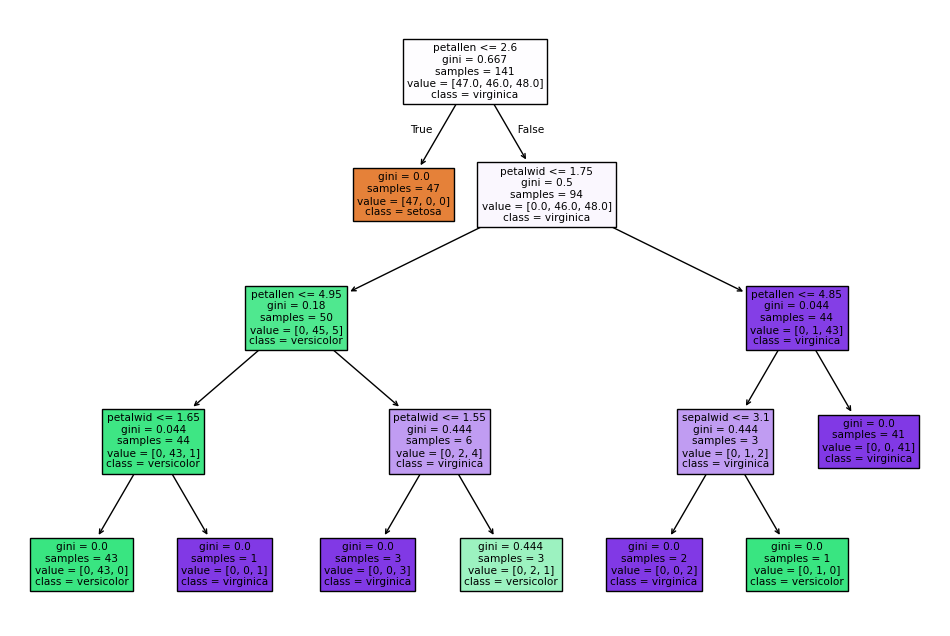

In [ ]:
import matplotlib.pyplot as plt

FEATURES = COLUMNS[0:4]

#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv
model = dtree_model_final

tree.export_graphviz(model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

#
# Tree display...
#
fig = plt.figure(figsize=(12,8))
tree_plot = tree.plot_tree(model,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=SPECIES,      # and these!!
                   filled=True)

plt.show()

### Optional:  Use the predictive model!

We can use the predictive model to make predictions and try it out!

In [ ]:
#
# Ok!  We have our model, let's use it...
#
# ... in a data-trained predictive model (k-nearest-neighbors), using scikit-learn
#
# warning: this model has NOT yet been tuned to its "best k"
#
def predictive_model( Features, model ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                      # extra brackets needed so it's 2d
    predicted_species_list = model.predict(our_features)   # PREDICT!

    predicted_species = int(round(predicted_species_list[0]))  # unpack the one element it contains
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
ListofFeatures = [ [4.2,3.1,2.0,0.4],
                   [5.8,2.7,4.1,1.0],
                   [4.6,3.6,3.0,2.2],
                   [6.7,3.3,5.7,2.1],
                   [4.2,4.2,4.2,4.2],
                   [1.0,42,4.7,0.01],        # -4.7? .01?  0?
                   ]

for Features in ListofFeatures:
    predicted_species = predictive_model( Features, dtree_model_final )
    name = SPECIES[predicted_species]                          # look up the species
    print(f"From the Features {Features}, I predict : {name}")

From the Features [4.2, 3.1, 2.0, 0.4], I predict : setosa
From the Features [5.8, 2.7, 4.1, 1.0], I predict : versicolor
From the Features [4.6, 3.6, 3.0, 2.2], I predict : versicolor
From the Features [6.7, 3.3, 5.7, 2.1], I predict : virginica
From the Features [4.2, 4.2, 4.2, 4.2], I predict : versicolor
From the Features [1.0, 42, 4.7, 0.01], I predict : versicolor


### Predictive models aren't perfect!
+ Notice that the fourth prediction above is (probably) wrong
  + It probably predicted _versicolor_, but it was actually a _virginica_
  + In essence, it was a _virginica_ iris that "looked more like" a _versicolor_ ... ***from these four features!***
  + A botanist would use more than these four features to classify difference species...

+ **Key**: Even when the modeling process runs "perfectly," the models are likely to be imperfect...
+ ... it's just that we won't know where the imperfections are -- until future observations arrive!

### That's it! Our model is complete...

... not perfect, but **complete**

What does this mean?

It means that the model -- the function (above) -- is ***already*** prepared to provide an output for every possible input!

We can see this in a plot of the outputs for every input in the "sepal" plane (length vs. width) as well as the "petal" plane:

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
sepallen = 4.0
sepalwid = 2.0
# petallen =
# petalwid =

VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = dtree_model_final


col = 0
row = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features,MODEL)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")  # so we know it's running
  if col % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the lower-left corner

..........................................
......................................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


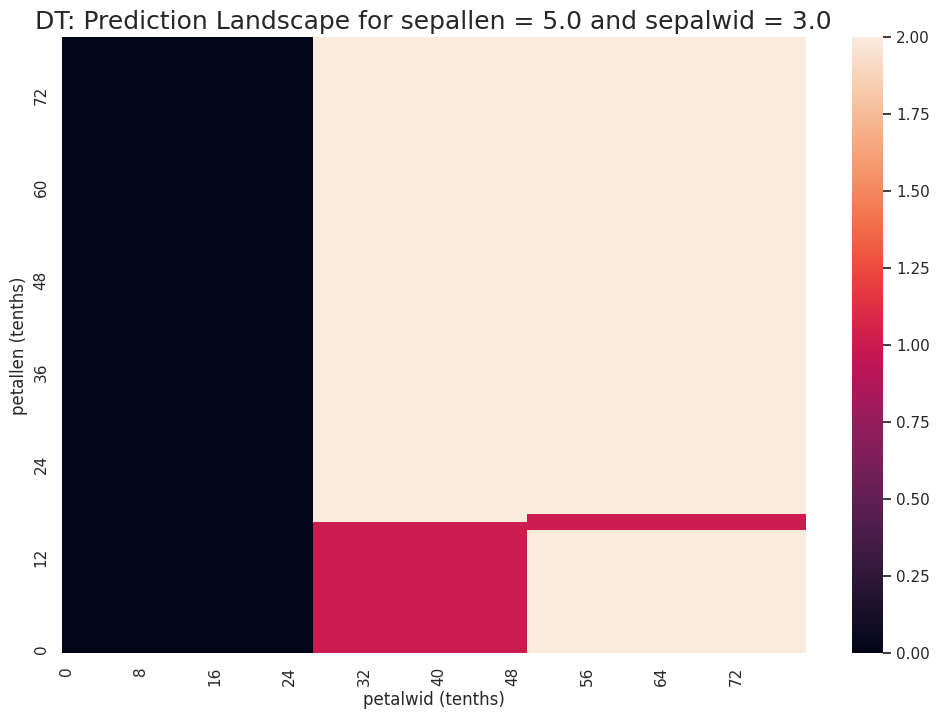

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="petalwid (tenths)", ylabel="petallen (tenths)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])
ax.set_title("DT: Prediction Landscape for sepallen = 5.0 and sepalwid = 3.0", fontsize=18)


print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

<br>
<hr>
<br>

## Next, <b>Random Forests</b>

Random Forests are simply a LOT of decision trees...

After you have a lot of decision trees, they all vote on how to classify a new input observation!

The Machine Learning workflow is exactly the same: only the algorithm name changes:

### Iris classification via Decision Trees (above) and <b>Random Forests</b> (here)

This is simply a repeat of whole ML workflow, because it's an amazing advantage to have the whole process in mind! (No harm in repeating it here!) You can show/no-show parts with <tt>if True</tt> and <tt>if False</tt>

+ Section 1: Library imports
+ Section 2: Read the already-cleaned iris data  (you're set - you used it above)
+ Section 3:  Drop any columns we don't want to use
+ Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
+ Section 5:  convert from pandas (spreadsheet) to numpy (array)
+ Section 6:  define our features (X_all) and our target-to-predict (y_all)
+ Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
+ Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
+ Section 9:  Let's see how our model does on the TEST data...
+ Section 10:  Let's cross-validate to find the "best" depth
+ Section 11:  Let's build a final model + find _feature importances_

In [ ]:
# Section 1:  Libraries
#
import time
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "iris_cleaned.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('irisname', axis=COLUMN )
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier
best_d = 1            # we don't know what depth to use, so let's guess 1 (not a good guess)
best_num_trees = 42   # we don't know how many trees to use, so let's guess 42
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, n_estimators=best_num_trees, max_samples=0.5)  # 0.5 of the data each tree
rforest_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print(f"Built a Random Forest with depth={best_d} and number of trees={best_num_trees}")

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = rforest_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_d = 1         # range(1,6)
best_num_trees = 50   # [50,150,250]
best_accuracy = 0
for d in range(1,6):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, n_estimators=ntrees,max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        if True: print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy;   best_d = d;      best_num_trees = ntrees
if True: print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

# Section 11:  Here's where the model-building happens with the best-found parameters:
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, n_estimators=best_num_trees, max_samples=0.5)
rforest_model_tuned.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("Created and trained a classifier with best_depth =", best_depth)
# print the feature importances...
if False:  print("\nThe feature importances are", rforest_model_tuned.feature_importances_)

Cross-validating...
depth:  1 ntrees:  50 cv accuracy:  0.9285
depth:  1 ntrees: 150 cv accuracy:  0.9368
depth:  1 ntrees: 250 cv accuracy:  0.9458
depth:  2 ntrees:  50 cv accuracy:  0.9285
depth:  2 ntrees: 150 cv accuracy:  0.9462
depth:  2 ntrees: 250 cv accuracy:  0.9372
depth:  3 ntrees:  50 cv accuracy:  0.9375
depth:  3 ntrees: 150 cv accuracy:  0.9368
depth:  3 ntrees: 250 cv accuracy:  0.9372
depth:  4 ntrees:  50 cv accuracy:  0.9194
depth:  4 ntrees: 150 cv accuracy:  0.9368
depth:  4 ntrees: 250 cv accuracy:  0.9372
depth:  5 ntrees:  50 cv accuracy:  0.9372
depth:  5 ntrees: 150 cv accuracy:  0.9103
depth:  5 ntrees: 250 cv accuracy:  0.9281
best_depth: 4 and best_num_trees: 150 are our choices. Acc: 0.9462450592885375
Created and trained a classifier with best_depth = 4


One of the forest's trees is DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                       random_state=2041738730)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petallen <= 4.7\ngini = 0.65\nsamples = 54\nvalue = [26, 16, 28]\nclass = virginica", fillcolor="#f9f6fe"] ;
1 [label="petalwid <= 0.8\ngini = 0.472\nsamples = 33\nvalue = [26, 16, 0]\nclass = setosa", fillcolor="#f5cfb3"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 19\nvalue = [26, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 14\nvalue = [0, 16, 0]\nclass = versicolor", fillcolor="#39e581"] ;
1 -> 3 ;
4 [label="gini = 0.0\nsamples = 21\nvalue = [0, 0, 28]\nclass = virginica", fillcolor="#8139e5"] ;
0 -> 4 [labeldistan

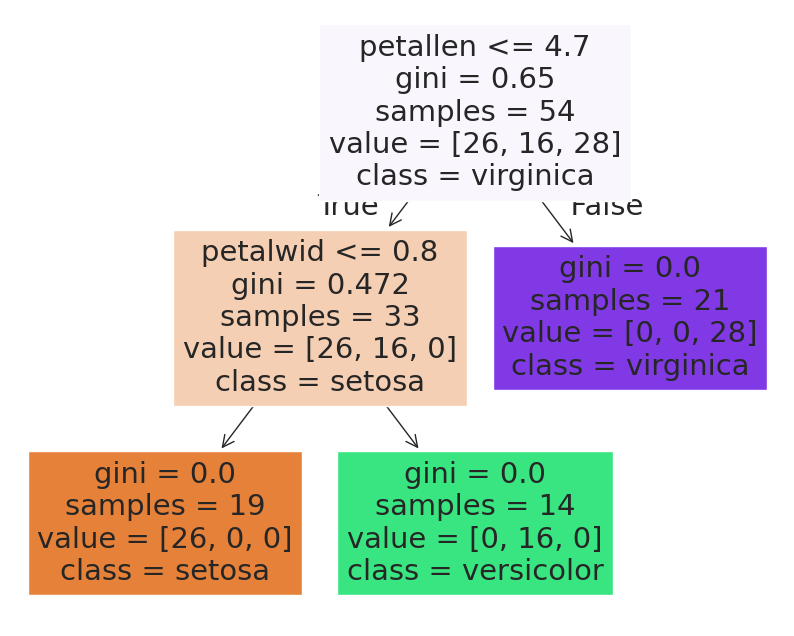

In [ ]:
#
# we can get the individual trees, if we want...  Let's try it on tree #28
#
tree_index = 28   # which tree
one_rf_tree = rforest_model_tuned.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")
with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

# One tree:
fig = plt.figure(figsize=(10,8))
tree_plot = tree.plot_tree(one_rf_tree,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=SPECIES,      # and these!!
                   filled=True)

In [ ]:
#
# final predictive model (random forests), with tuned parameters + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [6.7,3.3,5.7,0.1]  # [5.8,2.7,4.1,1.0] [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]

LoF = [
[4.8, 3.1, 1.6, 0.2 ],   # actually setosa
[5.7, 2.9, 4.2, 1.3 ],   # actually versicolor
[5.8, 2.7, 5.1, 1.9 ],   # actually virginica
[5.2, 4.1, 1.5, 0.1 ],   # actually setosa
[5.4, 3.4, 1.5, 0.4 ],   # actually setosa
[5.1, 2.5, 3.0, 1.1 ],   # actually versicolor
[6.2, 2.9, 4.3, 1.3 ],   # actually versicolor
[6.3, 3.3, 6.0, 2.5 ],   # actually virginica
[5.7, 2.8, 4.1, 1.3 ],   # actually virginica  <-- almost always wrong!
]

# run on each one:
for Features in LoF:
    predicted_species = predictive_model( Features, rforest_model_tuned )  # pass in the model, too!
    name = SPECIES[predicted_species]
    print(f"from the features {Features} I predict {name}")    # Answers in the assignment...

from the features [4.8, 3.1, 1.6, 0.2] I predict setosa
from the features [5.7, 2.9, 4.2, 1.3] I predict versicolor
from the features [5.8, 2.7, 5.1, 1.9] I predict virginica
from the features [5.2, 4.1, 1.5, 0.1] I predict setosa
from the features [5.4, 3.4, 1.5, 0.4] I predict setosa
from the features [5.1, 2.5, 3.0, 1.1] I predict versicolor
from the features [6.2, 2.9, 4.3, 1.3] I predict versicolor
from the features [6.3, 3.3, 6.0, 2.5] I predict virginica
from the features [5.7, 2.8, 4.1, 1.3] I predict versicolor


#### We can visualize parameter space...

_for any model_ &nbsp; Let's "see inside" our Random Forest:

+ first by computing all of the predictions in two dimensions
+ then by showing them as a heatmap!

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
sepallen = 5.0
sepalwid = 3.0
# petallen =
# petalwid =

VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = rforest_model_tuned

col = 0
row = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features,MODEL)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")  # so we know it's running
  if col % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner

..........................................
......................................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


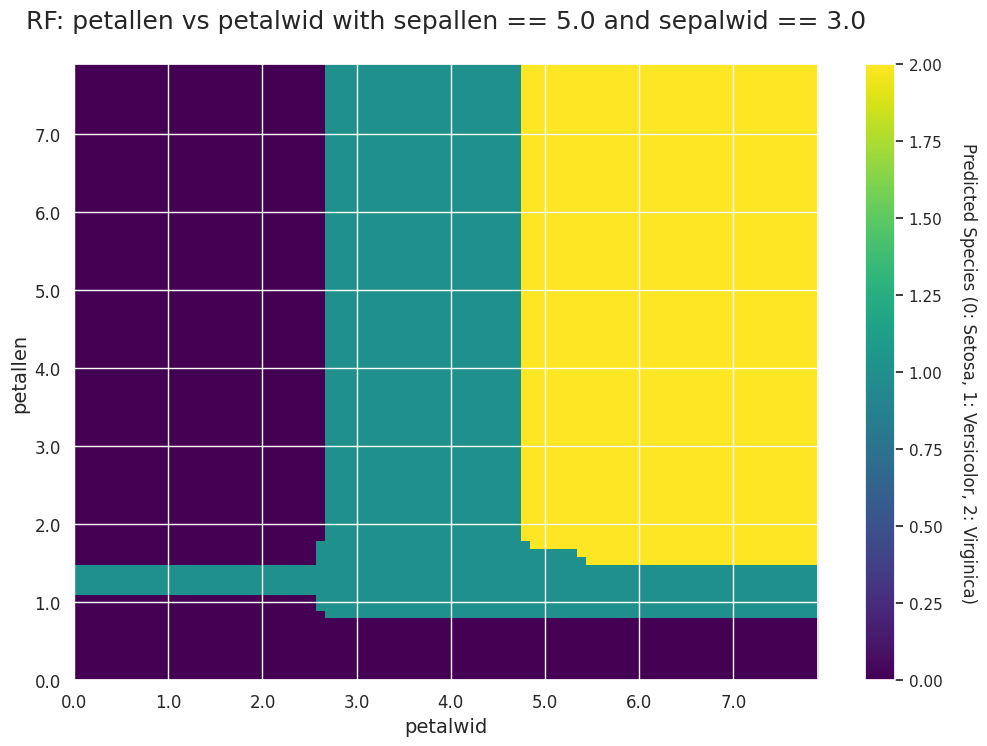

Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

#sns.set(rc = {'figure.figsize':(18,12)})  # figure size!

fig, ax = plt.subplots(figsize=(12,8))

# Create the heatmap
im = ax.imshow(PLANE, cmap="viridis", extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()], origin="lower", aspect="auto")

# Set axis labels and ticks
ax.set_xlabel("petalwid", fontsize=14)
ax.set_ylabel("petallen", fontsize=14)

ax.set_title(f"RF: petallen vs petalwid with sepallen == {sepallen:.1f} and sepalwid == {sepalwid:.1f}\n", fontsize=18)
# Calculate the indices for reduced ticks and labels
reduced_tick_indices = np.arange(0, len(HORIZONT), len(HORIZONT)//8)
# Ensure that the last index is included
# if reduced_tick_indices[-1] != len(HORIZONT)-1:
#   reduced_tick_indices = np.append(reduced_tick_indices, len(HORIZONT)-1)


# Set ticks and tick labels with correct values
ax.set_xticks(HORIZONT[reduced_tick_indices]) # Display ticks every 0.4 unit
ax.set_yticks(VERTICAL[reduced_tick_indices])
ax.set_xticklabels([f"{x:.1f}" for x in HORIZONT[reduced_tick_indices]], fontsize=12)  # Format x-axis labels
ax.set_yticklabels([f"{y:.1f}" for y in VERTICAL[reduced_tick_indices]], fontsize=12)  # Format y-axis labels

# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Predicted Species (0: Setosa, 1: Versicolor, 2: Virginica)', rotation=270, labelpad=25)

plt.show()

print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

We've done it!

Remember that the model _thinks_ it knows everything...

The _feature importances_ are probably what it knows the best:

In [ ]:
rforest_model_tuned.feature_importances_

array([0.09165555, 0.02286281, 0.43441648, 0.45106517])

<br>
<hr>
<br>

# Your tasks!

Based on the examples above, your task is to build a DT+RF model (along with the tests and visualizations) for two datasets:

*   the births dataset and
*   the digits dataset

<br>
<hr>
<br>

Suggestion:  Perhaps open this notebook twice...

_Then you can copy-paste-adapt the iris workflow to each new dataset!_

<br>
<hr>
<br>

As optional EC, track down another dataset of your own choosing and build a DT+RF model  

Notice that this can be an excellent final project, too! 😃

In [ ]:
# births

import time
import sklearn
import numpy as np
import pandas as pd

cleaned_filename = "births_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)
df_model0 = df_tidy.drop('above/below median', axis=1)
df_model1 = df_model0.drop('births', axis=1)

# organizing... so fun... I'm very organized......
COLUMNS = df_model1.columns
POPULARITY = ['below','above']
POPULARITY_INDEX = { s:i for i,s in enumerate(POPULARITY) }
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }

# munpy! I mean-- numpy!!!
A = df_model1.to_numpy()
A = A.astype('float64')
NUM_ROWS, NUM_COLS = A.shape

# (features, what to predict)
X_all = A[:,0:2]
y_all = A[:,2]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)
from sklearn import tree
best_depth = 3
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model.fit(X_train, y_train)

# teeeeeeeeeeeeeeeest!!!!!!
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test
if False:
  print("Predicted labels:", predicted_labels)
  print("Actual  labels  :", actual_labels)
  num_correct = sum(predicted_labels == actual_labels)
  total = len(actual_labels)
  print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# cross multiply-- I mean validate! of course, haha...
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_depth = 3
best_accuracy = 0.0
for depth in range(1,10):
  dtree_cv_model = tree.DecisionTreeClassifier(max_depth=depth)
  cv_scores = cross_val_score( dtree_cv_model, X_train, y_train, cv=5 )
  this_cv_accuracy = cv_scores.mean()
  if this_cv_accuracy > best_accuracy:
      best_accuracy = this_cv_accuracy
      best_depth = depth
  all_accuracies.append(this_cv_accuracy)
print(f"best_depth = {best_depth}  \n    yields the highest cv accuracy: {best_accuracy}\n")

# final!!! ...but the best depth keeps changing T v T
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model_final.fit(X_all, y_all)
if True:  print("Created and trained a classifier with best_depth =", best_depth)
print("\nThe feature importances are", dtree_model_final.feature_importances_)


best_depth = 3  
    yields the highest cv accuracy: 0.8424897720631211

Created and trained a classifier with best_depth = 3

The feature importances are [0.95108384 0.04891616]


file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="month <= 5.5\ngini = 0.5\nsamples = 365\nvalue = [179, 186]\nclass = above", fillcolor="#f8fbfe"] ;
1 [label="month <= 3.5\ngini = 0.22\nsamples = 151\nvalue = [132, 19]\nclass = below", fillcolor="#e99356"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="month <= 1.5\ngini = 0.32\nsamples = 90\nvalue = [72, 18]\nclass = below", fillcolor="#eca06a"] ;
1 -> 2 ;
3 [label="gini = 0.121\nsamples = 31\nvalue = [29, 2]\nclass = below", fillcolor="#e78a47"] ;
2 -> 3 ;
4 [label="gini = 0.395\nsamples = 59\nvalue = [43, 16]\nclass = below", fillcolor="#efb083"] ;
2 -> 4 ;
5 [label="day <= 19.5\ngini = 0.032\nsamples = 61\nvalue = [60, 1]\nclass = below", fillcolor="#e5833c"] ;
1 -> 5 ;
6 [label="gini = 0.0\nsamples = 38\nvalue

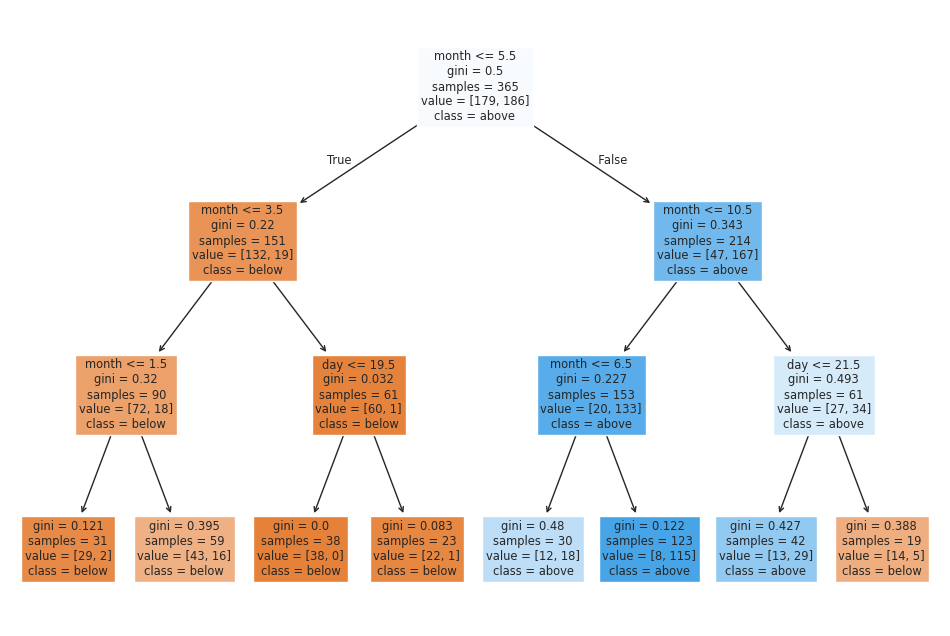

In [ ]:
# T R E E

import matplotlib.pyplot as plt
FEATURES = COLUMNS[0:2]

filename = 'tree_data.gv'
model = dtree_model_final

tree.export_graphviz(model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=POPULARITY,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

#
# Tree display...
#
fig = plt.figure(figsize=(12,8))
tree_plot = tree.plot_tree(model,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=POPULARITY,      # and these!!
                   filled=True)

plt.show()

In [ ]:
def predictive_model( Features, model ):
    """ input: a list of two features
                [month, day]
        output: the predicted popularity of births on that day:
                                          above or below median
    """
    our_features = np.asarray([Features])
    predicted_popularity_list = model.predict(our_features)

    predicted_popularity = int(round(predicted_popularity_list[0]))
    return predicted_popularity

ListofFeatures = [ [5,9],
                   [6, 18],
                   [2,25],
                   [20,11],
                   [1,10],
                   [1,34],
                   ]

for Features in ListofFeatures:
    predicted_popularity = predictive_model( Features, dtree_model_final )
    name = POPULARITY[predicted_popularity]
    print(f"From the Features {Features}, I predict : {name}")

From the Features [5, 9], I predict : below
From the Features [6, 18], I predict : above
From the Features [2, 25], I predict : below
From the Features [20, 11], I predict : above
From the Features [1, 10], I predict : below
From the Features [1, 34], I predict : below


............
 [[0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 

Text(0.5, 1.0, 'DT: Prediction for Popularity of Birthdays')

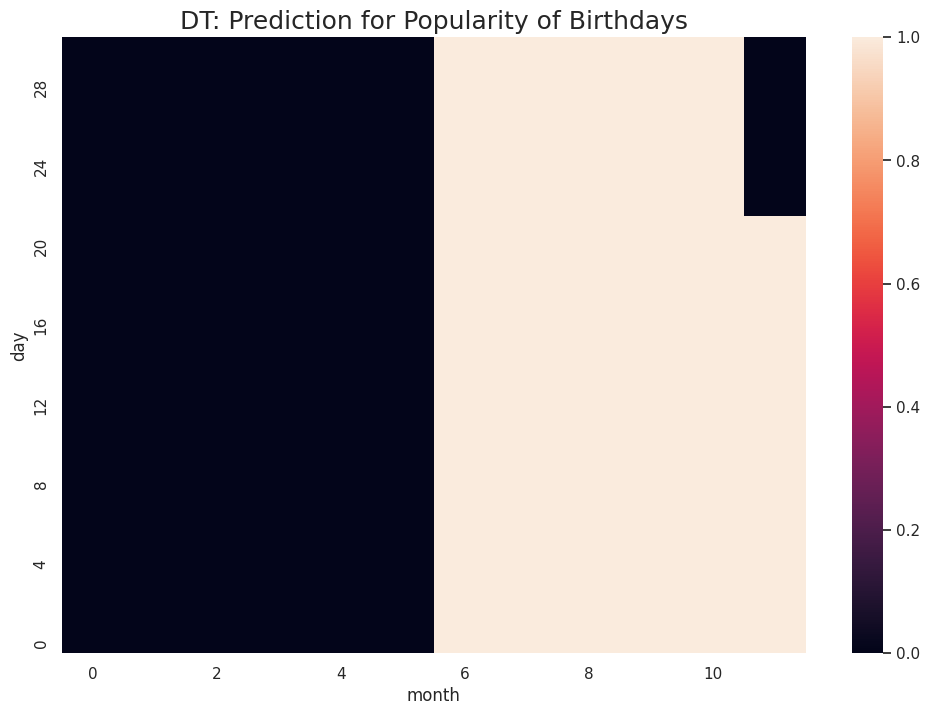

In [ ]:
VERTICAL = np.arange(0,12,1)
HORIZONT = np.arange(0,31,1)
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) )
MODEL = dtree_model_final

col = 0
row = 0
for month in VERTICAL:
  for day in HORIZONT:
    Features = [month, day]
    output = predictive_model(Features,MODEL)
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")
print("\n", PLANE[0:30,0:10])

import seaborn as sns

sns.set(rc = {'figure.figsize':(12,8)})
ax = sns.heatmap(PLANE)
ax.invert_yaxis()
ax.set(xlabel="month", ylabel="day")
ax.set_xticks(ax.get_xticks()[::2])
ax.set_yticks(ax.get_yticks()[::4])
ax.set_title("DT: Prediction for Popularity of Birthdays", fontsize=18)

In [ ]:
# births
# forests are cool. I think.

import time
import sklearn
import numpy as np
import pandas as pd

cleaned_filename = "births_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)
df_model0 = df_tidy.drop('above/below median', axis=1)
df_model1 = df_model0.drop('births', axis=1)

# organizing... so fun... I'm very organized......
COLUMNS = df_model1.columns
POPULARITY = ['below','above']
POPULARITY_INDEX = { s:i for i,s in enumerate(POPULARITY) }
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }

# munpy! I mean-- numpy!!!
A = df_model1.to_numpy()
A = A.astype('float64')
NUM_ROWS, NUM_COLS = A.shape

# (features, what to predict)
X_all = A[:,0:2]
y_all = A[:,2]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)
from sklearn import tree
from sklearn import ensemble # Y E E E E L L L L L L L L L L L L below this changes in random forests ANKDDANKDNKDNNVKNDNK
best_d = 3
best_num_trees = 33
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, n_estimators=best_num_trees, max_samples=0.5)
rforest_model.fit(X_train, y_train)

# teeeeeeeeeeeeeeeest!!!!!!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test
if False:
  print("Predicted labels:", predicted_labels)
  print("Actual  labels  :", actual_labels)
  num_correct = sum(predicted_labels == actual_labels)
  total = len(actual_labels)
  print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# cross multiply-- I mean validate! of course, haha...
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_d = 3
best_num_trees = 50
best_accuracy = 0.0
for d in range(1,6):
  for ntrees in [50,100,150]:
    rforest_model = ensemble.RandomForestClassifier(max_depth=d, n_estimators=ntrees,max_samples=0.5)
    cv_scores = cross_val_score(rforest_model, X_train, y_train, cv=5)
    average_cv_accuracy = cv_scores.mean()
    if average_cv_accuracy > best_accuracy:
      best_accuracy = average_cv_accuracy;   best_d = d;      best_num_trees = ntrees
print(f"best_d: {best_d} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_d, n_estimators=best_num_trees, max_samples=0.5)
rforest_model_tuned.fit(X_all, y_all)
print("\nThe feature importances are", rforest_model_tuned.feature_importances_)

best_d: 5 and best_num_trees: 150 are our choices. Acc: 0.8492109877264756

The feature importances are [0.77195501 0.22804499]


One of the forest's trees is DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1614096578)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="day <= 3.5\ngini = 0.499\nsamples = 149\nvalue = [88.0, 94.0]\nclass = above", fillcolor="#f2f9fd"] ;
1 [label="month <= 6.5\ngini = 0.434\nsamples = 18\nvalue = [7.0, 15.0]\nclass = above", fillcolor="#95cbf1"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = below", fillcolor="#e58139"] ;
1 -> 2 ;
3 [label="day <= 1.5\ngini = 0.117\nsamples = 12\nvalue = [1, 15]\nclass = above", fillcolor="#46a4e7"] ;
1 -> 3 ;
4 [label="month <= 10.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = above", fillcolor="#9ccef2"] ;
3 -> 4 ;
5 [label="gin

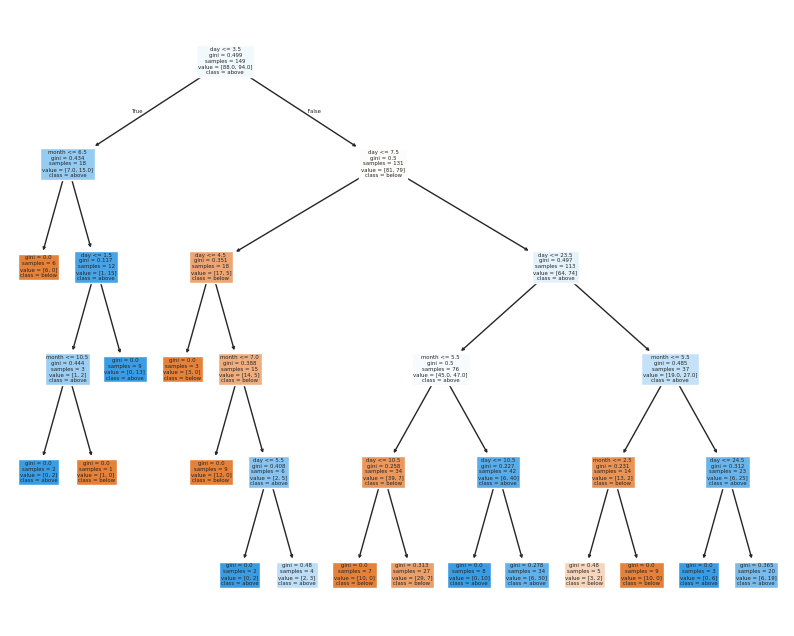

In [ ]:
#
# we can get the individual trees, if we want...  Let's try it on tree #28
#
tree_index = 28   # which tree
one_rf_tree = rforest_model_tuned.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=POPULARITY,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")
with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

# One tree:
fig = plt.figure(figsize=(10,8))
tree_plot = tree.plot_tree(one_rf_tree,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=POPULARITY,      # and these!!
                   filled=True)

In [ ]:
# it takes up so much s p a c e

In [ ]:
#
def predictive_model( Features, Model ):
    """ input: a list of two features
                [month,day]
        output: the predicted popularity of birthdays:
                                 above or below median
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_popularity = Model.predict(our_features)       # The model's prediction!
    predicted_popularity = int(round(predicted_popularity[0]))  # unpack the extra brackets
    return predicted_popularity

LoF = [
[4,9],
[9,9],
[2,31],
[12,70],
[14,8],
]

for Features in LoF:
    predicted_popularity = predictive_model( Features, rforest_model_tuned )  # pass in the model, too!
    name = POPULARITY[predicted_popularity]
    print(f"from the features {Features} I predict {name}")

from the features [4, 9] I predict below
from the features [9, 9] I predict above
from the features [2, 31] I predict below
from the features [12, 70] I predict above
from the features [14, 8] I predict above


............
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


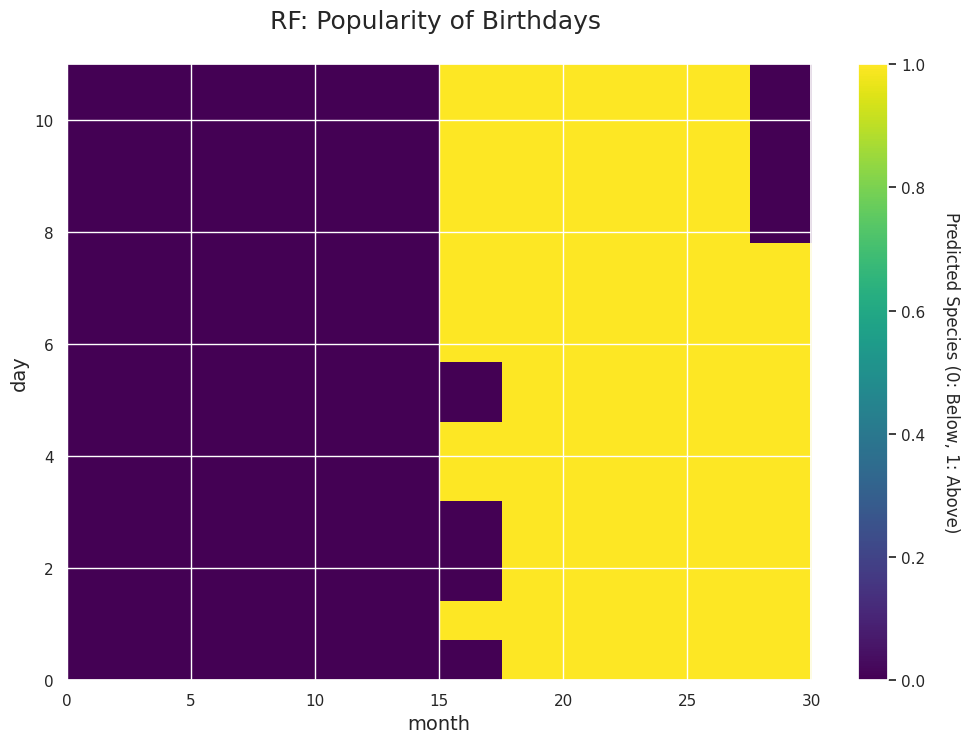

In [ ]:
VERTICAL = np.arange(0,12,1) # array of vertical input values
HORIZONT = np.arange(0,31,1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = rforest_model_tuned

col = 0
row = 0
for month in VERTICAL:
  for day in HORIZONT:
    Features = [month,day]
    output = predictive_model(Features,MODEL)
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")

print("\n", PLANE[0:3,0:3])

import seaborn as sns

fig, ax = plt.subplots(figsize=(12,8))

im = ax.imshow(PLANE, cmap="viridis", extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()], origin="lower", aspect="auto")

ax.set_xlabel("month", fontsize=14)
ax.set_ylabel("day", fontsize=14)

ax.set_title(f"RF: Popularity of Birthdays \n", fontsize=18)

reduced_tick_indices = np.arange(0, len(HORIZONT), len(HORIZONT)//8)

# ax.set_xticks(HORIZONT[reduced_tick_indices]) # Display ticks every 0.4 unit
# ax.set_yticks(VERTICAL[reduced_tick_indices])
# ax.set_xticklabels([f"{x:.1f}" for x in HORIZONT[reduced_tick_indices]], fontsize=12)  # Format x-axis labels
# ax.set_yticklabels([f"{y:.1f}" for y in VERTICAL[reduced_tick_indices]], fontsize=12)  # Format y-axis labels

# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Predicted Species (0: Below, 1: Above)', rotation=270, labelpad=25)

plt.show()


In [ ]:
# digits

import time
import sklearn
import numpy as np
import pandas as pd

cleaned_filename = "digits_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)
df_model1 = df_tidy

# organizing... so fun... I'm very organized......
COLUMNS = df_model1.columns
DIGIT = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
DIDIT_INDEX = { c:i for i,c in enumerate(DIGIT) }
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }

# munpy! I mean-- numpy!!!
A = df_model1.to_numpy()
A = A.astype('float64')
NUM_ROWS, NUM_COLS = A.shape

# (features, what to predict)
X_all = A[:,0:64]
y_all = A[:,64]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)
from sklearn import tree
best_depth = 3
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model.fit(X_train, y_train)

# teeeeeeeeeeeeeeeest!!!!!!
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test
if False:
  print("Predicted labels:", predicted_labels)
  print("Actual  labels  :", actual_labels)
  num_correct = sum(predicted_labels == actual_labels)
  total = len(actual_labels)
  print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# cross multiply-- I mean validate! of course, haha...
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_depth = 3
best_accuracy = 0.0
for depth in range(1,20):
  dtree_cv_model = tree.DecisionTreeClassifier(max_depth=depth)
  cv_scores = cross_val_score( dtree_cv_model, X_train, y_train, cv=5 )
  this_cv_accuracy = cv_scores.mean()
  if this_cv_accuracy > best_accuracy:
      best_accuracy = this_cv_accuracy
      best_depth = depth
  all_accuracies.append(this_cv_accuracy)
print(f"best_depth = {best_depth}  \n    yields the highest cv accuracy: {best_accuracy}\n")

# final!!! ...but the best depth keeps changing T v T
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model_final.fit(X_all, y_all)
if True:  print("Created and trained a classifier with best_depth =", best_depth)
print("\nThe feature importances are", dtree_model_final.feature_importances_)


best_depth = 17  
    yields the highest cv accuracy: 0.8620955817858306

Created and trained a classifier with best_depth = 17

The feature importances are [0.         0.00062847 0.00227821 0.01300476 0.00432672 0.05990198
 0.016202   0.         0.         0.01071006 0.01555501 0.0021817
 0.01125637 0.02011097 0.         0.         0.0012479  0.00457071
 0.01996789 0.01999969 0.04765517 0.07597264 0.00182556 0.
 0.00123905 0.00310046 0.01759625 0.05430514 0.00643681 0.04390401
 0.00117315 0.         0.         0.09846615 0.02745306 0.01236292
 0.07321137 0.02329737 0.00534373 0.         0.         0.00410719
 0.07638633 0.05451702 0.01635342 0.00691005 0.00718418 0.
 0.         0.         0.01156126 0.0059405  0.00991743 0.01303271
 0.02339732 0.0022625  0.         0.00062847 0.00515178 0.00219965
 0.05988084 0.00081701 0.00383857 0.00062847]


In [ ]:
dtree_model_final

DecisionTreeClassifier(max_depth=17)

file tree_data2.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix36 <= 0.5\ngini = 0.9\nsamples = 1768\nvalue = [173, 179, 175, 181, 178, 178, 179, 177, 172, 176]\nclass = 3", fillcolor="#ffffff"] ;
1 [label="pix33 <= 0.5\ngini = 0.544\nsamples = 266\nvalue = [169, 0, 4, 1, 5, 25, 5, 0, 2, 55]\nclass = 0", fillcolor="#f1bb94"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="pix21 <= 6.0\ngini = 0.45\nsamples = 76\nvalue = [0, 0, 4, 1, 1, 11, 3, 0, 1, 55]\nclass = 9", fillcolor="#ed798e"] ;
1 -> 2 ;
3 [label="pix18 <= 10.0\ngini = 0.609\nsamples = 19\nvalue = [0, 0, 3, 0, 1, 11, 3, 0, 0, 1]\nclass = 5", fillcolor="#9ccef2"] ;
2 -> 3 ;
4 [label="pix43 <= 13.5\ngini = 0.688\nsamples = 8\nvalue = [0, 0, 3, 0, 1, 0, 3, 0, 0, 1]\nclass = 2", fillcolor="#ffffff"] ;
3 -> 4 ;
5 [label="

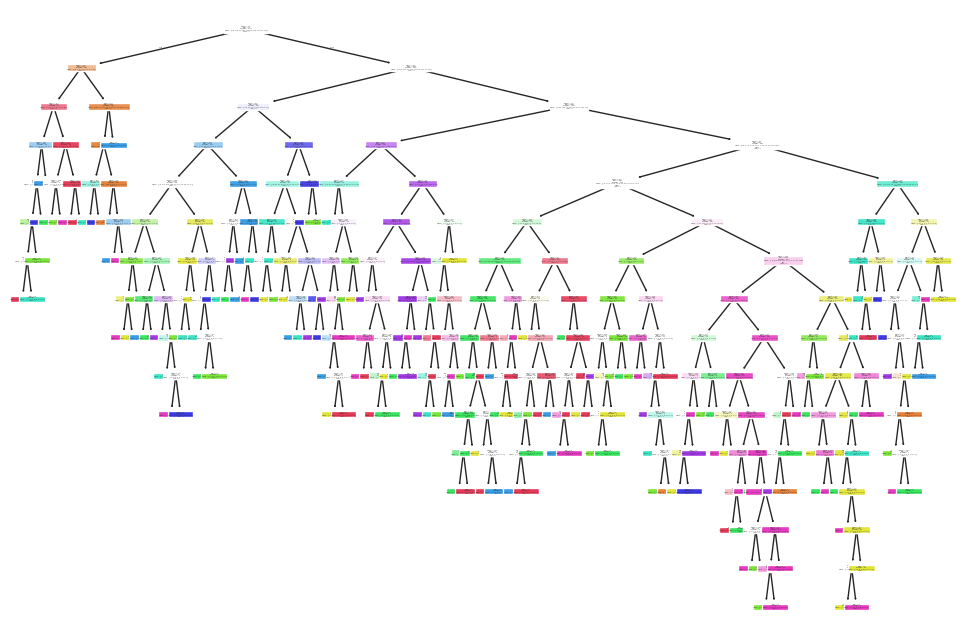

In [ ]:
# T R E E (pt. 2)

import matplotlib.pyplot as plt
FEATURES = COLUMNS[0:64]

filename = 'tree_data2.gv'
model = dtree_model_final

tree.export_graphviz(model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=DIGIT,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

#
# Tree display...
#
fig = plt.figure(figsize=(12,8))
tree_plot = tree.plot_tree(model,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=DIGIT,      # and these!!
                   filled=True)

plt.show()

In [ ]:
def predictive_model( Features, Model ):
    """ input: a list of 64 features

        output: the predicted number, 0-9
    """
    our_features = np.asarray([Features])
    predicted_species = Model.predict(our_features)
    predicted_species = int(round(predicted_species[0]))
    return predicted_species

ListofFeatures = [ [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,1,4,6,7,2,1,0,0,1,5,1,3,6,7,0,0,5,16,14,12,10,2,3,4,0,0,3,0,16,0,14,0,1,0,0,0,12,1,2,4,6,7,8,9,0,0,0,6,7,0,0,0,12,14,0,0,0,8,9,0,0,0],
                   [0,2,1,3,2,4,3,5,4,6,5,7,6,8,7,9,8,10,9,11,10,12,13,15,0,2,1,3,2,4,3,5,4,6,5,7,6,8,7,9,8,10,9,11,10,12,13,15,0,2,1,3,2,4,3,5,4,6,5,7,6,8,7,9]
                 ]

for Features in ListofFeatures:
    predicted_number = predictive_model(Features, dtree_model_final)
    print(f"from the features {Features} \nI predict {predicted_number} ")

from the features [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
I predict 9 
from the features [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
I predict 5 
from the features [0, 0, 1, 4, 6, 7, 2, 1, 0, 0, 1, 5, 1, 3, 6, 7, 0, 0, 5, 16, 14, 12, 10, 2, 3, 4, 0, 0, 3, 0, 16, 0, 14, 0, 1, 0, 0, 0, 12, 1, 2, 4, 6, 7, 8, 9, 0, 0, 0, 6, 7, 0, 0, 0, 12, 14, 0, 0, 0, 8, 9, 0, 0, 0] 
I predict 3 
from the features [0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 5, 7, 6, 8, 7, 9, 8, 10, 9, 11, 10, 12, 13, 15, 0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 5, 7, 6, 8, 7, 9, 8, 10, 9, 11, 10, 12, 13, 15, 0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 5, 7, 6, 8, 7, 9] 
I predict 1 


pixels as 1d numpy array (row):
 ([0, 0, 1, 4, 6, 7, 2, 1, 0, 0, 1, 5, 1, 3, 6, 7, 0, 0, 5, 16, 14, 12, 10, 2, 3, 4, 0, 0, 3, 0, 16, 0, 14, 0, 1, 0, 0, 0, 12, 1, 2, 4, 6, 7, 8, 9, 0, 0, 0, 6, 7, 0, 0, 0, 12, 14, 0, 0, 0, 8, 9, 0, 0, 0],)

pixels as 2d numpy array (image):
 [[ 0  0  1  4  6  7  2  1]
 [ 0  0  1  5  1  3  6  7]
 [ 0  0  5 16 14 12 10  2]
 [ 3  4  0  0  3  0 16  0]
 [14  0  1  0  0  0 12  1]
 [ 2  4  6  7  8  9  0  0]
 [ 0  6  7  0  0  0 12 14]
 [ 0  0  0  8  9  0  0  0]]


<Axes: >

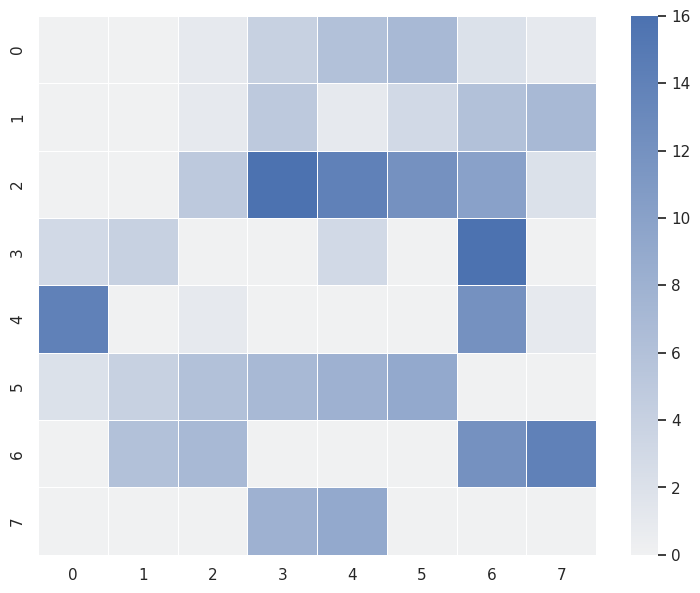

In [ ]:
# the one that was predicted as 3

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_theme()

apparently_3 = [0,0,1,4,6,7,2,1,0,0,1,5,1,3,6,7,0,0,5,16,14,12,10,2,3,4,0,0,3,0,16,0,14,0,1,0,0,0,12,1,2,4,6,7,8,9,0,0,0,6,7,0,0,0,12,14,0,0,0,8,9,0,0,0],


row_to_show = 42

pixels_as_row = apparently_3
print("pixels as 1d numpy array (row):\n", pixels_as_row)

pixels_as_image = np.reshape(apparently_3, (8,8))
print("\npixels as 2d numpy array (image):\n", pixels_as_image)

# create the figure, f, and the axes, ax:
f, ax = plt.subplots(figsize=(9, 7))

# colormap choice! Fun!
our_colormap = sns.color_palette("light:b", as_cmap=True)


# Draw a heatmap with the numeric values in each cell (make annot=False to remove the values)
sns.heatmap(pixels_as_image, annot=False, fmt="d", linewidths=.5, ax=ax, cmap=our_colormap)

In [ ]:
# digits
# forests are cool. I think.

import time
import sklearn
import numpy as np
import pandas as pd

cleaned_filename = "digits_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)
df_model1 = df_tidy

# organizing... so fun... I'm very organized......
COLUMNS = df_model1.columns
DIGIT = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
DIDIT_INDEX = { c:i for i,c in enumerate(DIGIT) }
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }

# munpy! I mean-- numpy!!!
A = df_model1.to_numpy()
A = A.astype('float64')
NUM_ROWS, NUM_COLS = A.shape

# (features, what to predict)
X_all = A[:,0:64]
y_all = A[:,64]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)
from sklearn import tree
from sklearn import ensemble # Y E E E E L L L L L L L L L L L L below this changes in random forests ANKDDANKDNKDNNVKNDNK
best_d = 3
best_num_trees = 33
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, n_estimators=best_num_trees, max_samples=0.5)
rforest_model.fit(X_train, y_train)

# teeeeeeeeeeeeeeeest!!!!!!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test
if False:
  print("Predicted labels:", predicted_labels)
  print("Actual  labels  :", actual_labels)
  num_correct = sum(predicted_labels == actual_labels)
  total = len(actual_labels)
  print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# cross multiply-- I mean validate! of course, haha...
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_d = 3
best_num_trees = 50
best_accuracy = 0.0
for d in range(1,6):
  for ntrees in [50,100,150]:
    rforest_model = ensemble.RandomForestClassifier(max_depth=d, n_estimators=ntrees,max_samples=0.5)
    cv_scores = cross_val_score(rforest_model, X_train, y_train, cv=5)
    average_cv_accuracy = cv_scores.mean()
    if average_cv_accuracy > best_accuracy:
      best_accuracy = average_cv_accuracy;   best_d = d;      best_num_trees = ntrees
print(f"best_d: {best_d} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_d, n_estimators=best_num_trees, max_samples=0.5)
rforest_model_tuned.fit(X_all, y_all)
print("\nThe feature importances are", rforest_model_tuned.feature_importances_)

best_d: 5 and best_num_trees: 150 are our choices. Acc: 0.9455454477106985

The feature importances are [0.00000000e+00 8.08727247e-04 2.20666945e-02 5.97764127e-03
 5.17133633e-03 1.67589790e-02 7.12432011e-03 4.55732600e-04
 0.00000000e+00 1.07074971e-02 2.35735135e-02 1.96005677e-03
 9.27509232e-03 3.16635494e-02 2.16989882e-03 1.50111194e-04
 0.00000000e+00 6.71861880e-03 1.63502093e-02 2.62029757e-02
 2.92893017e-02 5.31701515e-02 6.97454351e-03 1.49968129e-04
 0.00000000e+00 1.06246521e-02 4.55975624e-02 1.76081252e-02
 4.51019184e-02 2.81495351e-02 4.26378273e-02 5.42201792e-05
 0.00000000e+00 3.08413964e-02 2.71612528e-02 1.72725293e-02
 4.84323927e-02 2.14810150e-02 2.68171173e-02 0.00000000e+00
 0.00000000e+00 1.62087321e-02 4.41034655e-02 4.97682643e-02
 1.85446679e-02 1.17198137e-02 2.50054992e-02 2.36849343e-05
 0.00000000e+00 7.72086825e-04 1.11121208e-02 1.81922140e-02
 9.65851954e-03 2.91100889e-02 3.06497623e-02 1.92398727e-04
 0.00000000e+00 1.18865702e-03 1.90550069e

One of the forest's trees is DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1243390171)
file rf_tree_072.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix43 <= 2.5\ngini = 0.899\nsamples = 707\nvalue = [82, 89, 94, 104, 93, 94, 84, 84, 82, 78]\nclass = 3", fillcolor="#fcfffd"] ;
1 [label="pix20 <= 6.5\ngini = 0.8\nsamples = 267\nvalue = [64.0, 13.0, 7.0, 97.0, 4.0, 59.0, 7.0, 2.0, 11.0\n72.0]\nclass = 3", fillcolor="#ecfdf0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="pix41 <= 0.5\ngini = 0.76\nsamples = 141\nvalue = [57, 2, 6, 13, 4, 53, 7, 2, 3, 21]\nclass = 0", fillcolor="#fefbf8"] ;
1 -> 2 ;
3 [label="pix26 <= 10.5\ngini = 0.709\nsamples = 79\nvalue = [5, 2, 6, 10, 2, 46, 3, 2, 0, 21]\nclass = 5", fillcolor="#bedff6"] ;
2 -> 

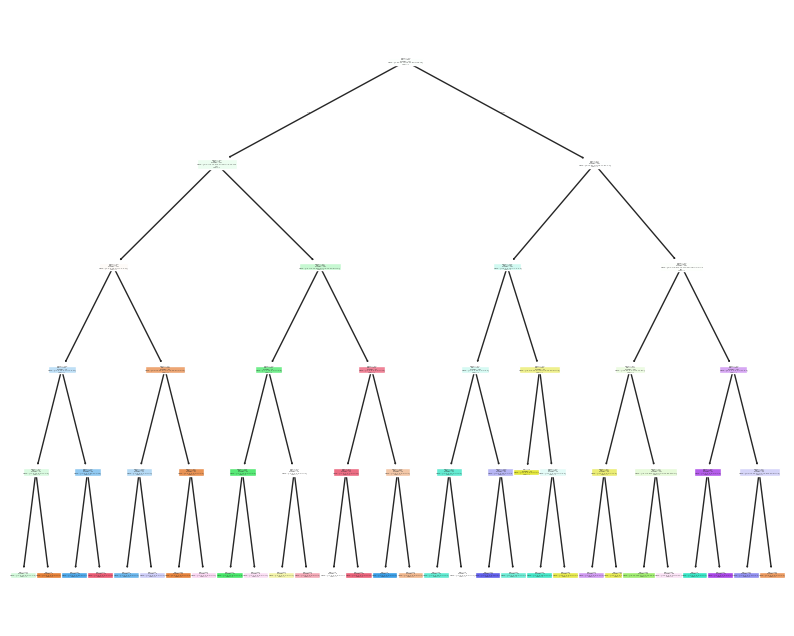

In [ ]:
#
# we can get the individual trees, if we want...  Let's try it on tree #72
#
tree_index = 72   # which tree
one_rf_tree = rforest_model_tuned.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=DIGIT,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")
with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

# One tree:
fig = plt.figure(figsize=(10,8))
tree_plot = tree.plot_tree(one_rf_tree,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=DIGIT,      # and these!!
                   filled=True)

In [ ]:
#
def predictive_model( Features, Model ):
    """ input: a list of 64 features

        output: the predicted number, 0-9
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_digit = Model.predict(our_features)       # The model's prediction!
    predicted_digit = int(round(predicted_digit[0]))  # unpack the extra brackets
    return predicted_digit

LoF = [
[0,0,1,4,6,7,2,1,0,0,1,5,1,3,6,7,0,0,5,16,14,12,10,2,3,4,0,0,3,0,16,0,14,0,1,0,0,0,12,1,2,4,6,7,8,9,0,0,0,6,7,0,0,0,12,14,0,0,0,8,9,0,0,0]
]

for Features in LoF:
    predicted_digit = predictive_model( Features, rforest_model_tuned )  # pass in the model, too!
    name = DIGIT[predicted_digit]
    print(f"from the features {Features} \nI predict {name}")

from the features [0, 0, 1, 4, 6, 7, 2, 1, 0, 0, 1, 5, 1, 3, 6, 7, 0, 0, 5, 16, 14, 12, 10, 2, 3, 4, 0, 0, 3, 0, 16, 0, 14, 0, 1, 0, 0, 0, 12, 1, 2, 4, 6, 7, 8, 9, 0, 0, 0, 6, 7, 0, 0, 0, 12, 14, 0, 0, 0, 8, 9, 0, 0, 0] 
I predict 7


pixels as 1d numpy array (row):
 [ 0  0  0  3 16  3  0  0  0  0  0 12 16  2  0  0  0  0  8 16 16  4  0  0
  0  7 16 15 16 12 11  0  0  8 16 16 16 13  3  0  0  0  0  7 14  1  0  0
  0  0  0  6 16  0  0  0  0  0  0  4 14  0  0  0]

pixels as 2d numpy array (image):
 [[ 0  0  0  3 16  3  0  0]
 [ 0  0  0 12 16  2  0  0]
 [ 0  0  8 16 16  4  0  0]
 [ 0  7 16 15 16 12 11  0]
 [ 0  8 16 16 16 13  3  0]
 [ 0  0  0  7 14  1  0  0]
 [ 0  0  0  6 16  0  0  0]
 [ 0  0  0  4 14  0  0  0]]


<Axes: >

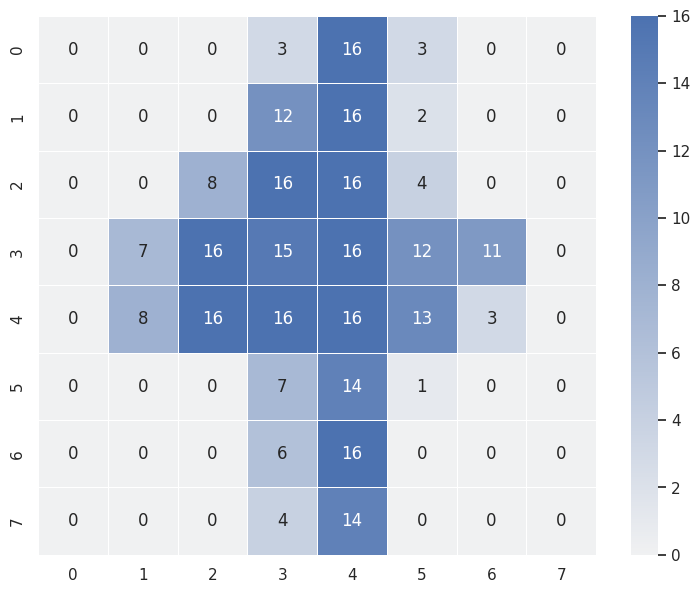

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_theme()

digits_cleaned = pd.read_csv('digits_cleaned.csv')
list_of_column_names = digits_cleaned.columns

ROW = 0
COLUMN = 1
digitsA = digits_cleaned.values

row_to_show = 110

pixels_as_row = digitsA[row_to_show,0:64]
print("pixels as 1d numpy array (row):\n", pixels_as_row)

pixels_as_image = np.reshape(pixels_as_row, (8,8))
print("\npixels as 2d numpy array (image):\n", pixels_as_image)

# create the figure, f, and the axes, ax:
f, ax = plt.subplots(figsize=(9, 7))

# colormap choice! Fun!
our_colormap = sns.color_palette("light:b", as_cmap=True)


# Draw a heatmap with the numeric values in each cell (make annot=False to remove the values)
sns.heatmap(pixels_as_image, annot=True, fmt="d", linewidths=.5, ax=ax, cmap=our_colormap)